## AOC 2024/16

### Part 1

--- Day 16: Reindeer Maze ---

It's time again for the Reindeer Olympics! This year, the big event is the Reindeer Maze, where the Reindeer compete for the lowest score.

You and The Historians arrive to search for the Chief right as the event is about to start. It wouldn't hurt to watch a little, right?

The Reindeer start on the Start Tile (marked S) facing East and need to reach the End Tile (marked E). They can move forward one tile at a time (increasing their score by 1 point), but never into a wall (#). They can also rotate clockwise or counterclockwise 90 degrees at a time (increasing their score by 1000 points).

To figure out the best place to sit, you start by grabbing a map (your puzzle input) from a nearby kiosk. For example:

```
    ###############
    #.......#....E#
    #.#.###.#.###.#
    #.....#.#...#.#
    #.###.#####.#.#
    #.#.#.......#.#
    #.#.#####.###.#
    #...........#.#
    ###.#.#####.#.#
    #...#.....#.#.#
    #.#.#.###.#.#.#
    #.....#...#.#.#
    #.###.#.#.#.#.#
    #S..#.....#...#
    ###############
```

There are many paths through this maze, but taking any of the best paths would incur a score of only 7036. This can be achieved by taking a total of 36 steps forward and turning 90 degrees a total of 7 times:

```
    ###############
    #.......#....E#
    #.#.###.#.###^#
    #.....#.#...#^#
    #.###.#####.#^#
    #.#.#.......#^#
    #.#.#####.###^#
    #..>>>>>>>>v#^#
    ###^#.#####v#^#
    #>>^#.....#v#^#
    #^#.#.###.#v#^#
    #^....#...#v#^#
    #^###.#.#.#v#^#
    #S..#.....#>>^#
    ###############
```

Here's a second example:

```
    #################
    #...#...#...#..E#
    #.#.#.#.#.#.#.#.#
    #.#.#.#...#...#.#
    #.#.#.#.###.#.#.#
    #...#.#.#.....#.#
    #.#.#.#.#.#####.#
    #.#...#.#.#.....#
    #.#.#####.#.###.#
    #.#.#.......#...#
    #.#.###.#####.###
    #.#.#...#.....#.#
    #.#.#.#####.###.#
    #.#.#.........#.#
    #.#.#.#########.#
    #S#.............#
    #################
```

In this maze, the best paths cost 11048 points; following one such path would look like this:

```
    #################
    #...#...#...#..E#
    #.#.#.#.#.#.#.#^#
    #.#.#.#...#...#^#
    #.#.#.#.###.#.#^#
    #>>v#.#.#.....#^#
    #^#v#.#.#.#####^#
    #^#v..#.#.#>>>>^#
    #^#v#####.#^###.#
    #^#v#..>>>>^#...#
    #^#v###^#####.###
    #^#v#>>^#.....#.#
    #^#v#^#####.###.#
    #^#v#^........#.#
    #^#v#^#########.#
    #S#>>^..........#
    #################
```

Note that the path shown above includes one 90 degree turn as the very first move, rotating the Reindeer from facing East to facing North.

Analyze your map carefully. What is the lowest score a Reindeer could possibly get?

To begin, get your puzzle input.

**AI Prompt**

I'm a skilled python developer, please help go consider various approaches for solving this problem and their pros/cons. I prefer simpler and understandable solutions, easily readable also for other developers. It's ok to generate code with testcases without explanation. I'll ask if I do not understand it. Always wrap test code into a function, to not clutter the global variable namespace.

**AI Response**

For this pathfinding problem, let's consider a few approaches:

1. A* Search
Pros:
- Efficient for finding shortest paths
- Will guarantee optimal solution
- Well-understood algorithm
Cons:
- Need to implement a good heuristic function
- Might be slightly complex to implement with the rotation costs

2. Dijkstra's Algorithm
Pros:
- Simpler than A*
- Will find optimal solution
- No need for heuristic function
Cons:
- Could be slower than A* as it explores more nodes

3. BFS with State
Pros:
- Simple to understand and implement
- Guaranteed to find optimal solution
- Can handle the rotation states well
Cons:
- Might be slower than A* or Dijkstra's
- Could use more memory

Would you like me to implement a solution using any of these approaches? I'm leaning towards Dijkstra's algorithm as it provides a good balance between simplicity and efficiency for this problem.

Which approach would you prefer to explore first?

In [ ]:
sample_input1 = """
###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############
""".strip()

In [ ]:
sample_input2 = """
#################
#...#...#...#..E#
#.#.#.#.#.#.#.#.#
#.#.#.#...#...#.#
#.#.#.#.###.#.#.#
#...#.#.#.....#.#
#.#.#.#.#.#####.#
#.#...#.#.#.....#
#.#.#####.#.###.#
#.#.#.......#...#
#.#.###.#####.###
#.#.#...#.....#.#
#.#.#.#####.###.#
#.#.#.........#.#
#.#.#.#########.#
#S#.............#
#################
""".strip()

**AI Prompt**

load full input

**AI Response**

I'll help you load the input using the `advent-of-code-data` library which is available in the environment. Here's a simple way to get the input and create test cases:

```python
from aocd import get_data
def get_puzzle_input():
    data = get_data(day=16, year=2024)
    return data

def test_input():
    return """###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############"""

# Get both inputs ready
puzzle_input = get_puzzle_input()
test = test_input()

print("Test input first few lines:")
print("\n".join(test.splitlines()[:5]))
print("\nActual input first few lines:")
print("\n".join(puzzle_input.splitlines()[:5]))
```

Would you like to proceed with implementing one of the solution approaches we discussed?

In [ ]:
from aocd import get_data
full_input = data = get_data(day=16, year=2024)

In [ ]:
import re

def estimate_size():
    nodes = len(re.sub(r'[#\n]','', full_input))
    print(f"Size of map {nodes}")

estimate_size()

Size of map 10131


**AI Prompt**

write a function that creates networkx nx.DiGraph as grid_2d_graph from the maze map. 
- Each cell in maze is represented with 4 distinct nodes (N, E, S, W) keeping state where the raindeer is currently facing.
- Between N, E, S, W, are edges with cost 1000 according to 90 degree rotation
- Between N, E, S, W nodes from adjacent maze cells are pairwise (N-N, E-E, S-S, W-W) edges with cost 1
- there is a special node for start, connected with edge of cost 0 to E node of maze cell marked with S
- there is a special node for end, connected with edges of cost 0 to all N E S W nodes of maze cell marked with E

**AI Response**

Here's a function to create the graph according to your specifications:

```python
import networkx as nx
from typing import Tuple

def create_maze_graph(maze_str: str) -> Tuple[nx.DiGraph, str, str]:
    # Create directed graph
    G = nx.DiGraph()
    
    # Convert maze to 2D array
    maze = maze_str.strip().splitlines()
    height, width = len(maze), len(maze[0])
    
    # Special start and end nodes
    start_node = 'START'
    end_node = 'END'
    
    # Directions and rotations
    directions = ['N', 'E', 'S', 'W']
    rotations = {'N': {'E': 1000, 'W': 1000},
                'E': {'S': 1000, 'N': 1000},
                'S': {'W': 1000, 'E': 1000},
                'W': {'N': 1000, 'S': 1000}}
    
    # Create nodes and rotation edges for each cell
    for y in range(height):
        for x in range(width):
            if maze[y][x] == '#':
                continue
                
            # Create 4 directional nodes for this cell
            cell_nodes = {d: f"{x},{y},{d}" for d in directions}
            
            # Add rotation edges between directions
            for d1, rot in rotations.items():
                for d2, cost in rot.items():
                    G.add_edge(cell_nodes[d1], cell_nodes[d2], weight=cost)
            
            # Connect to adjacent cells (cost 1)
            deltas = {'N': (0, -1), 'S': (0, 1), 'E': (1, 0), 'W': (-1, 0)}
            for d, (dx, dy) in deltas.items():
                new_x, new_y = x + dx, y + dy
                if (0 <= new_x < width and 0 <= new_y < height and 
                    maze[new_y][new_x] != '#'):
                    G.add_edge(cell_nodes[d], f"{new_x},{new_y},{d}", weight=1)
            
            # Connect start and end nodes
            if maze[y][x] == 'S':
                G.add_edge(start_node, f"{x},{y},E", weight=0)
            elif maze[y][x] == 'E':
                for d in directions:
                    G.add_edge(f"{x},{y},{d}", end_node, weight=0)
    
    return G, start_node, end_node

def test_graph_creation():
    G, start, end = create_maze_graph(sample_input1)
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    print(f"Start node: {start}")
    print(f"End node: {end}")
    # Test a few random edges exist
    print("\nSample edges:")
    for i, e in enumerate(G.edges(data=True)):
        if i < 5:  # Show first 5 edges
            print(e)
```

Would you like me to explain any part of this implementation, or should we proceed with testing it?

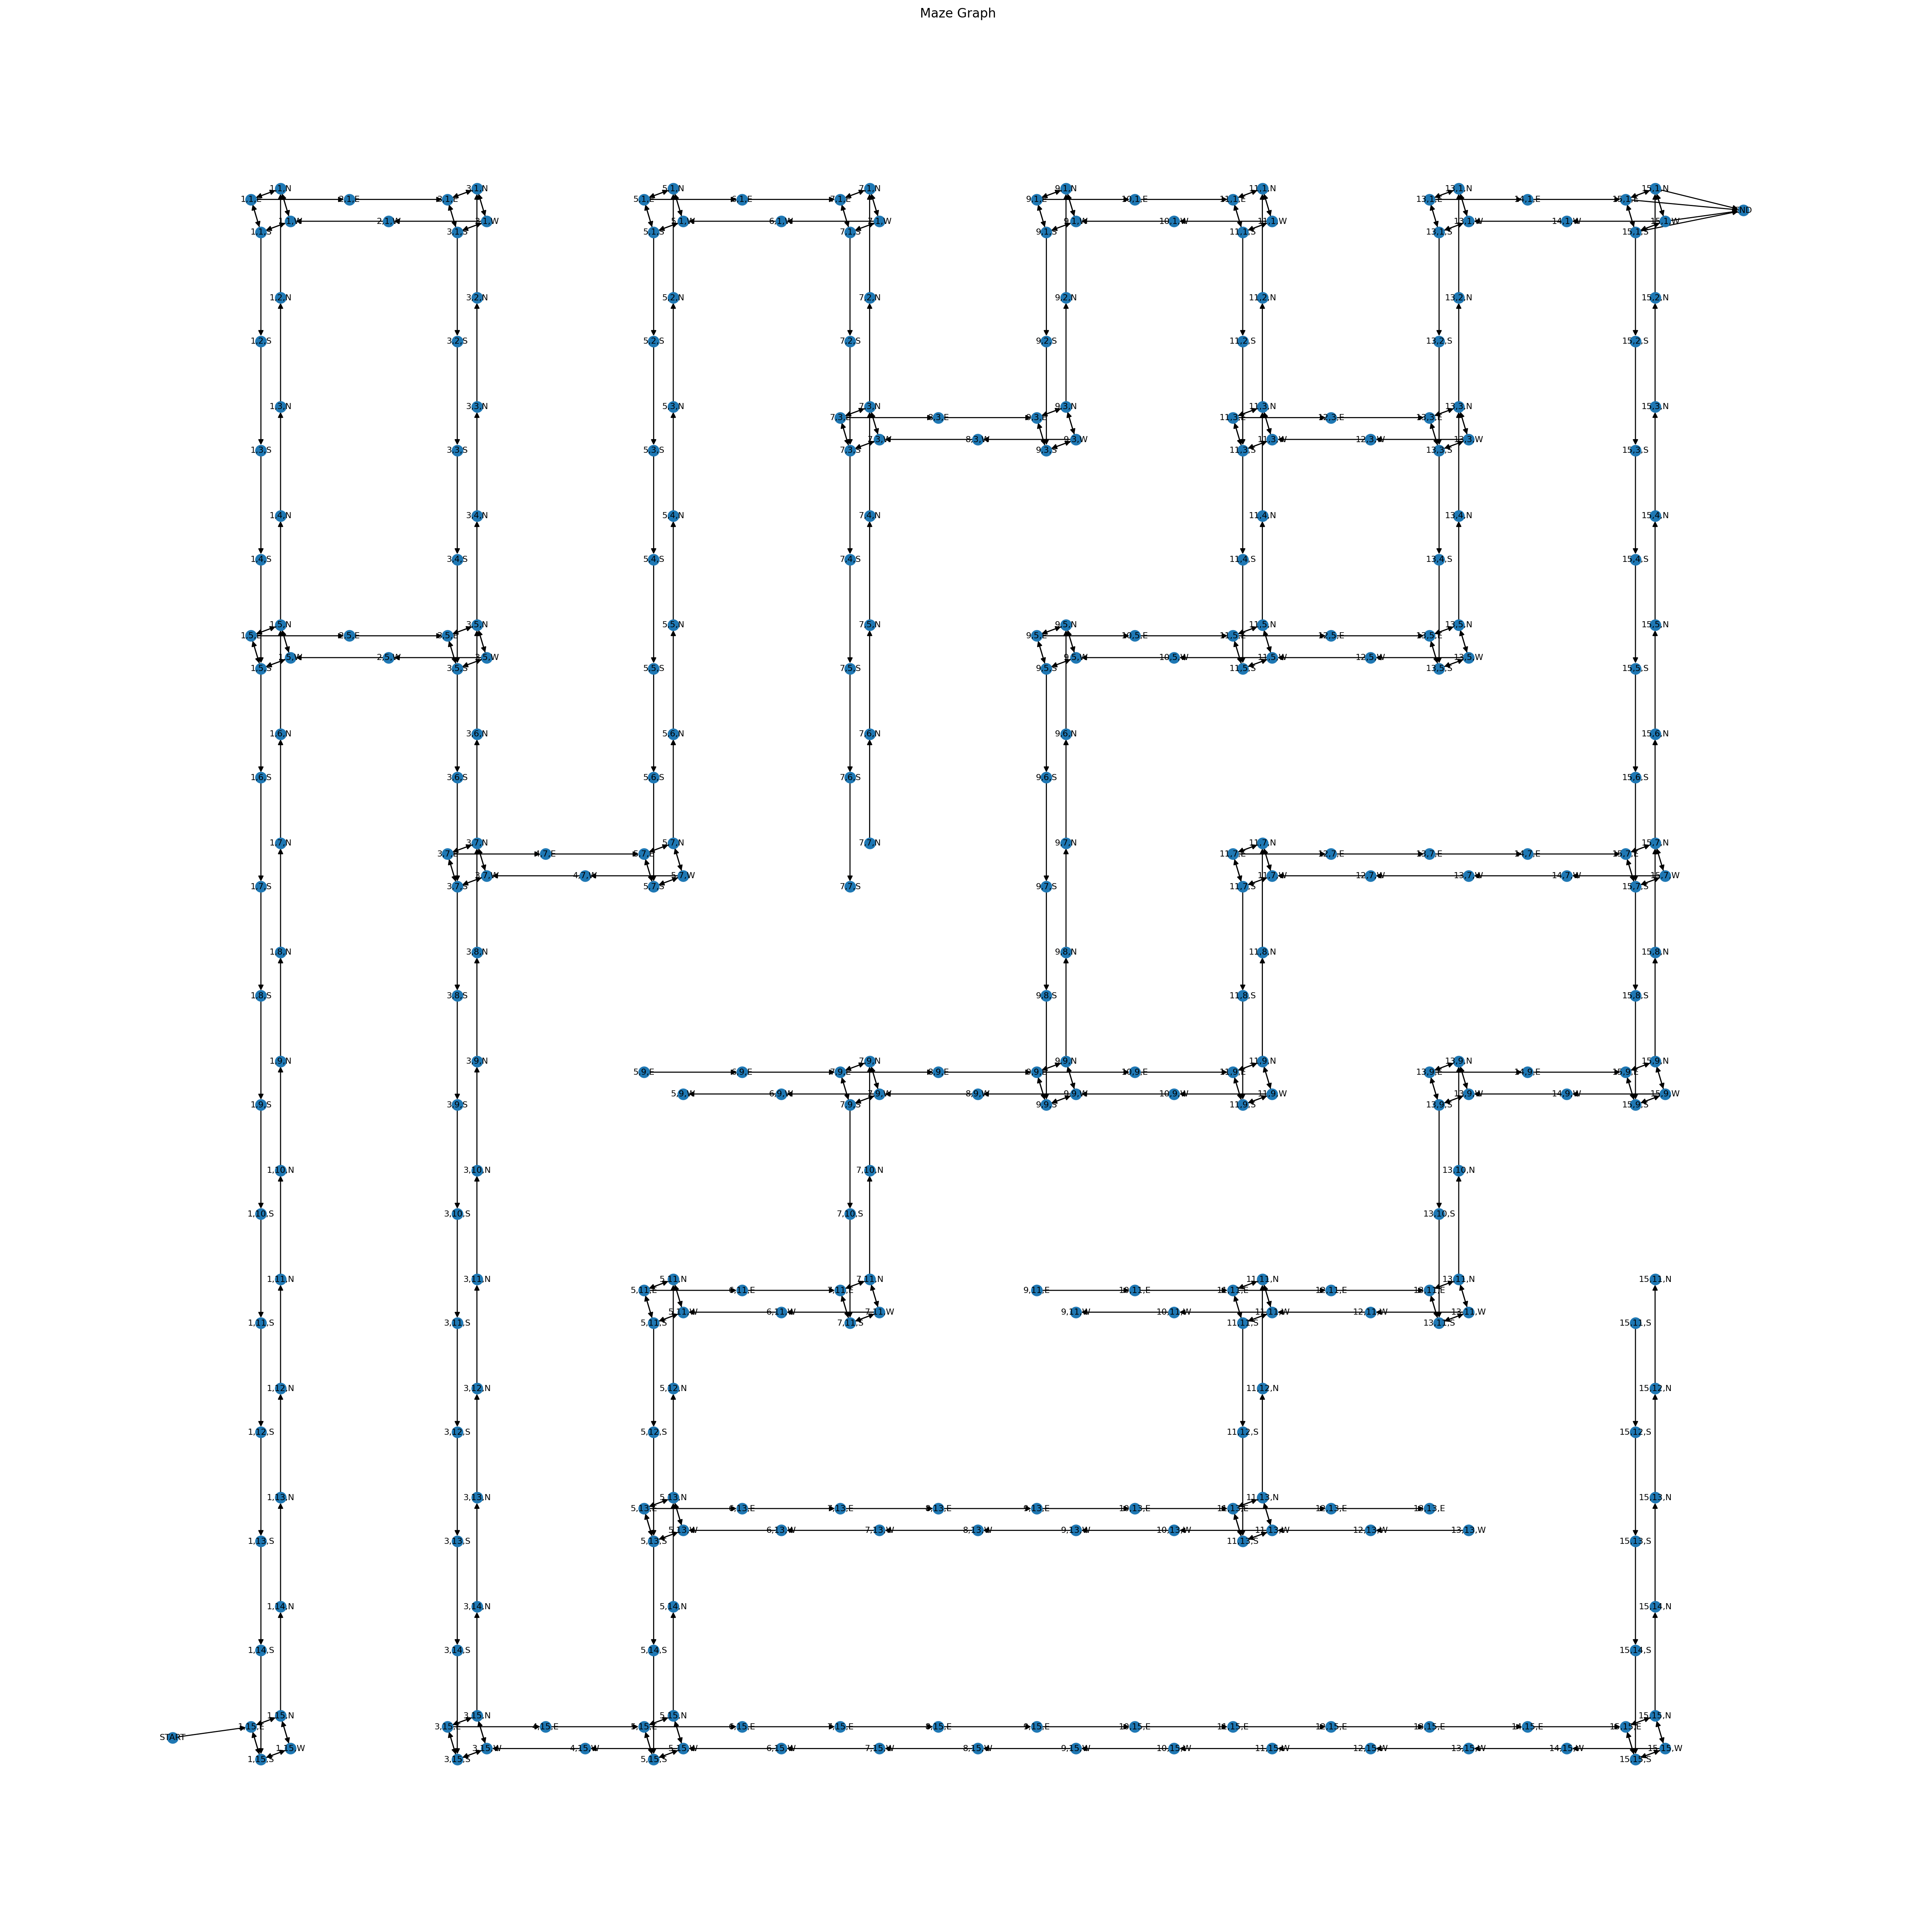

In [ ]:
import networkx as nx
from typing import Tuple

def create_maze_graph(maze_str: str) -> Tuple[nx.DiGraph, str, str]:
    # Create directed graph
    G = nx.DiGraph()
    
    # Convert maze to 2D array
    maze = maze_str.strip().splitlines()
    height, width = len(maze), len(maze[0])
    
    # Special start and end nodes
    start_node = 'START'
    end_node = 'END'
    
    # Directions and rotations
    directions = ['N', 'E', 'S', 'W']
    rotations = {'N': {'E': 1000, 'W': 1000},
                'E': {'S': 1000, 'N': 1000},
                'S': {'W': 1000, 'E': 1000},
                'W': {'N': 1000, 'S': 1000}}
    deltas = {'N': (0, -1), 'S': (0, 1), 'E': (1, 0), 'W': (-1, 0)}
    
    # Create nodes and rotation edges for each cell
    for y in range(height):
        for x in range(width):
            if maze[y][x] == '#':
                continue
                
            # Create 4 directional nodes for this cell
            cell_nodes = {d: f"{x},{y},{d}" for d in directions}
            
            # Add rotation edges between directions
            if (maze[y][x] != 'S') and (maze[y][x] != 'E') and (
                (maze[y][x-1] == '#' and maze[y][x+1] == '#') or 
                (maze[y-1][x] == '#' and maze[y+1][x] == '#')
            ):
                pass
            else:            
                for d1, rot in rotations.items():
                    for d2, cost in rot.items():
                        G.add_edge(cell_nodes[d1], cell_nodes[d2], weight=cost)
            
            # Connect to adjacent cells (cost 1)
            for d, (dx, dy) in deltas.items():
                new_x, new_y = x + dx, y + dy
                if (0 <= new_x < width and 0 <= new_y < height and 
                    maze[new_y][new_x] != '#'):
                    G.add_edge(cell_nodes[d], f"{new_x},{new_y},{d}", weight=1)
            
            # Connect start and end nodes
            if maze[y][x] == 'S':
                G.add_edge(start_node, f"{x},{y},E", weight=0)
            elif maze[y][x] == 'E':
                for d in directions:
                    G.add_edge(f"{x},{y},{d}", end_node, weight=0)
    
    return G, start_node, end_node

def test_graph_creation():
    G, start, end = create_maze_graph(sample_input1)
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    print(f"Start node: {start}")
    print(f"End node: {end}")
    # Test a few random edges exist
    print("\nSample edges:")
    for i, e in enumerate(G.edges(data=True)):
        if i < 5:  # Show first 5 edges
            print(e)

sample2_G, sample2_start, sample2_end = create_maze_graph(sample_input2)
draw_maze_graph(sample2_G)

In [ ]:
sample1_G, sample1_start, sample1_end = create_maze_graph(sample_input1)
sample2_G, sample2_start, sample2_end = create_maze_graph(sample_input2)
full_G, full_start, full_end = create_maze_graph(full_input)

In [ ]:
list(sample1_G.nodes(data=True))[:10]

[('1,1,N', {}),
 ('1,1,E', {}),
 ('1,1,W', {}),
 ('1,1,S', {}),
 ('1,2,S', {}),
 ('2,1,E', {}),
 ('3,1,E', {}),
 ('2,1,W', {}),
 ('3,1,N', {}),
 ('3,1,W', {})]

In [ ]:
list(sample1_G.edges(data=True))[:20]

[('1,1,N', '1,1,E', {'weight': 1000}),
 ('1,1,N', '1,1,W', {'weight': 1000}),
 ('1,1,E', '1,1,S', {'weight': 1000}),
 ('1,1,E', '1,1,N', {'weight': 1000}),
 ('1,1,E', '2,1,E', {'weight': 1}),
 ('1,1,W', '1,1,N', {'weight': 1000}),
 ('1,1,W', '1,1,S', {'weight': 1000}),
 ('1,1,S', '1,1,W', {'weight': 1000}),
 ('1,1,S', '1,1,E', {'weight': 1000}),
 ('1,1,S', '1,2,S', {'weight': 1}),
 ('1,2,S', '1,3,S', {'weight': 1}),
 ('2,1,E', '3,1,E', {'weight': 1}),
 ('3,1,E', '3,1,S', {'weight': 1000}),
 ('3,1,E', '3,1,N', {'weight': 1000}),
 ('3,1,E', '4,1,E', {'weight': 1}),
 ('2,1,W', '1,1,W', {'weight': 1}),
 ('3,1,N', '3,1,E', {'weight': 1000}),
 ('3,1,N', '3,1,W', {'weight': 1000}),
 ('3,1,W', '3,1,N', {'weight': 1000}),
 ('3,1,W', '3,1,S', {'weight': 1000})]

**AI Prompt**

draw the graph in grid layout
    - keep, START END as separate nodes
    - Start one row lower, 
    - End one row above the corresponding maze cell nodes

**AI Response**

Here's a function to visualize the graph with the specified layout:

```python
def draw_maze_graph(G, maze_str):
    import matplotlib.pyplot as plt
    
    # Parse maze for dimensions
    maze = maze_str.strip().splitlines()
    height, width = len(maze), len(maze[0])
    
    # Create position dictionary
    pos = {}
    
    # Regular nodes
    for node in G.nodes():
        if node == 'START':
            # Find S in maze
            for y in range(height):
                for x in range(width):
                    if maze[y][x] == 'S':
                        pos[node] = (x, -y-1)  # One row below
        elif node == 'END':
            # Find E in maze
            for y in range(height):
                for x in range(width):
                    if maze[y][x] == 'E':
                        pos[node] = (x, -y+1)  # One row above
        else:
            # Regular nodes "x,y,D"
            x, y, d = node.split(',')
            x, y = int(x), int(y)
            # Offset based on direction
            dx = {'N': 0, 'E': 0.2, 'S': 0, 'W': -0.2}
            dy = {'N': 0.2, 'E': 0, 'S': -0.2, 'W': 0}
            pos[node] = (x + dx[d], -y + dy[d])
    
    plt.figure(figsize=(15, 15))
    nx.draw(G, pos, with_labels=True, node_size=100, font_size=6)
    plt.title("Maze Graph")
    plt.show()

# Test with sample input
draw_maze_graph(sample1_G, sample_input1)
```

Would you like me to modify any aspect of the visualization?

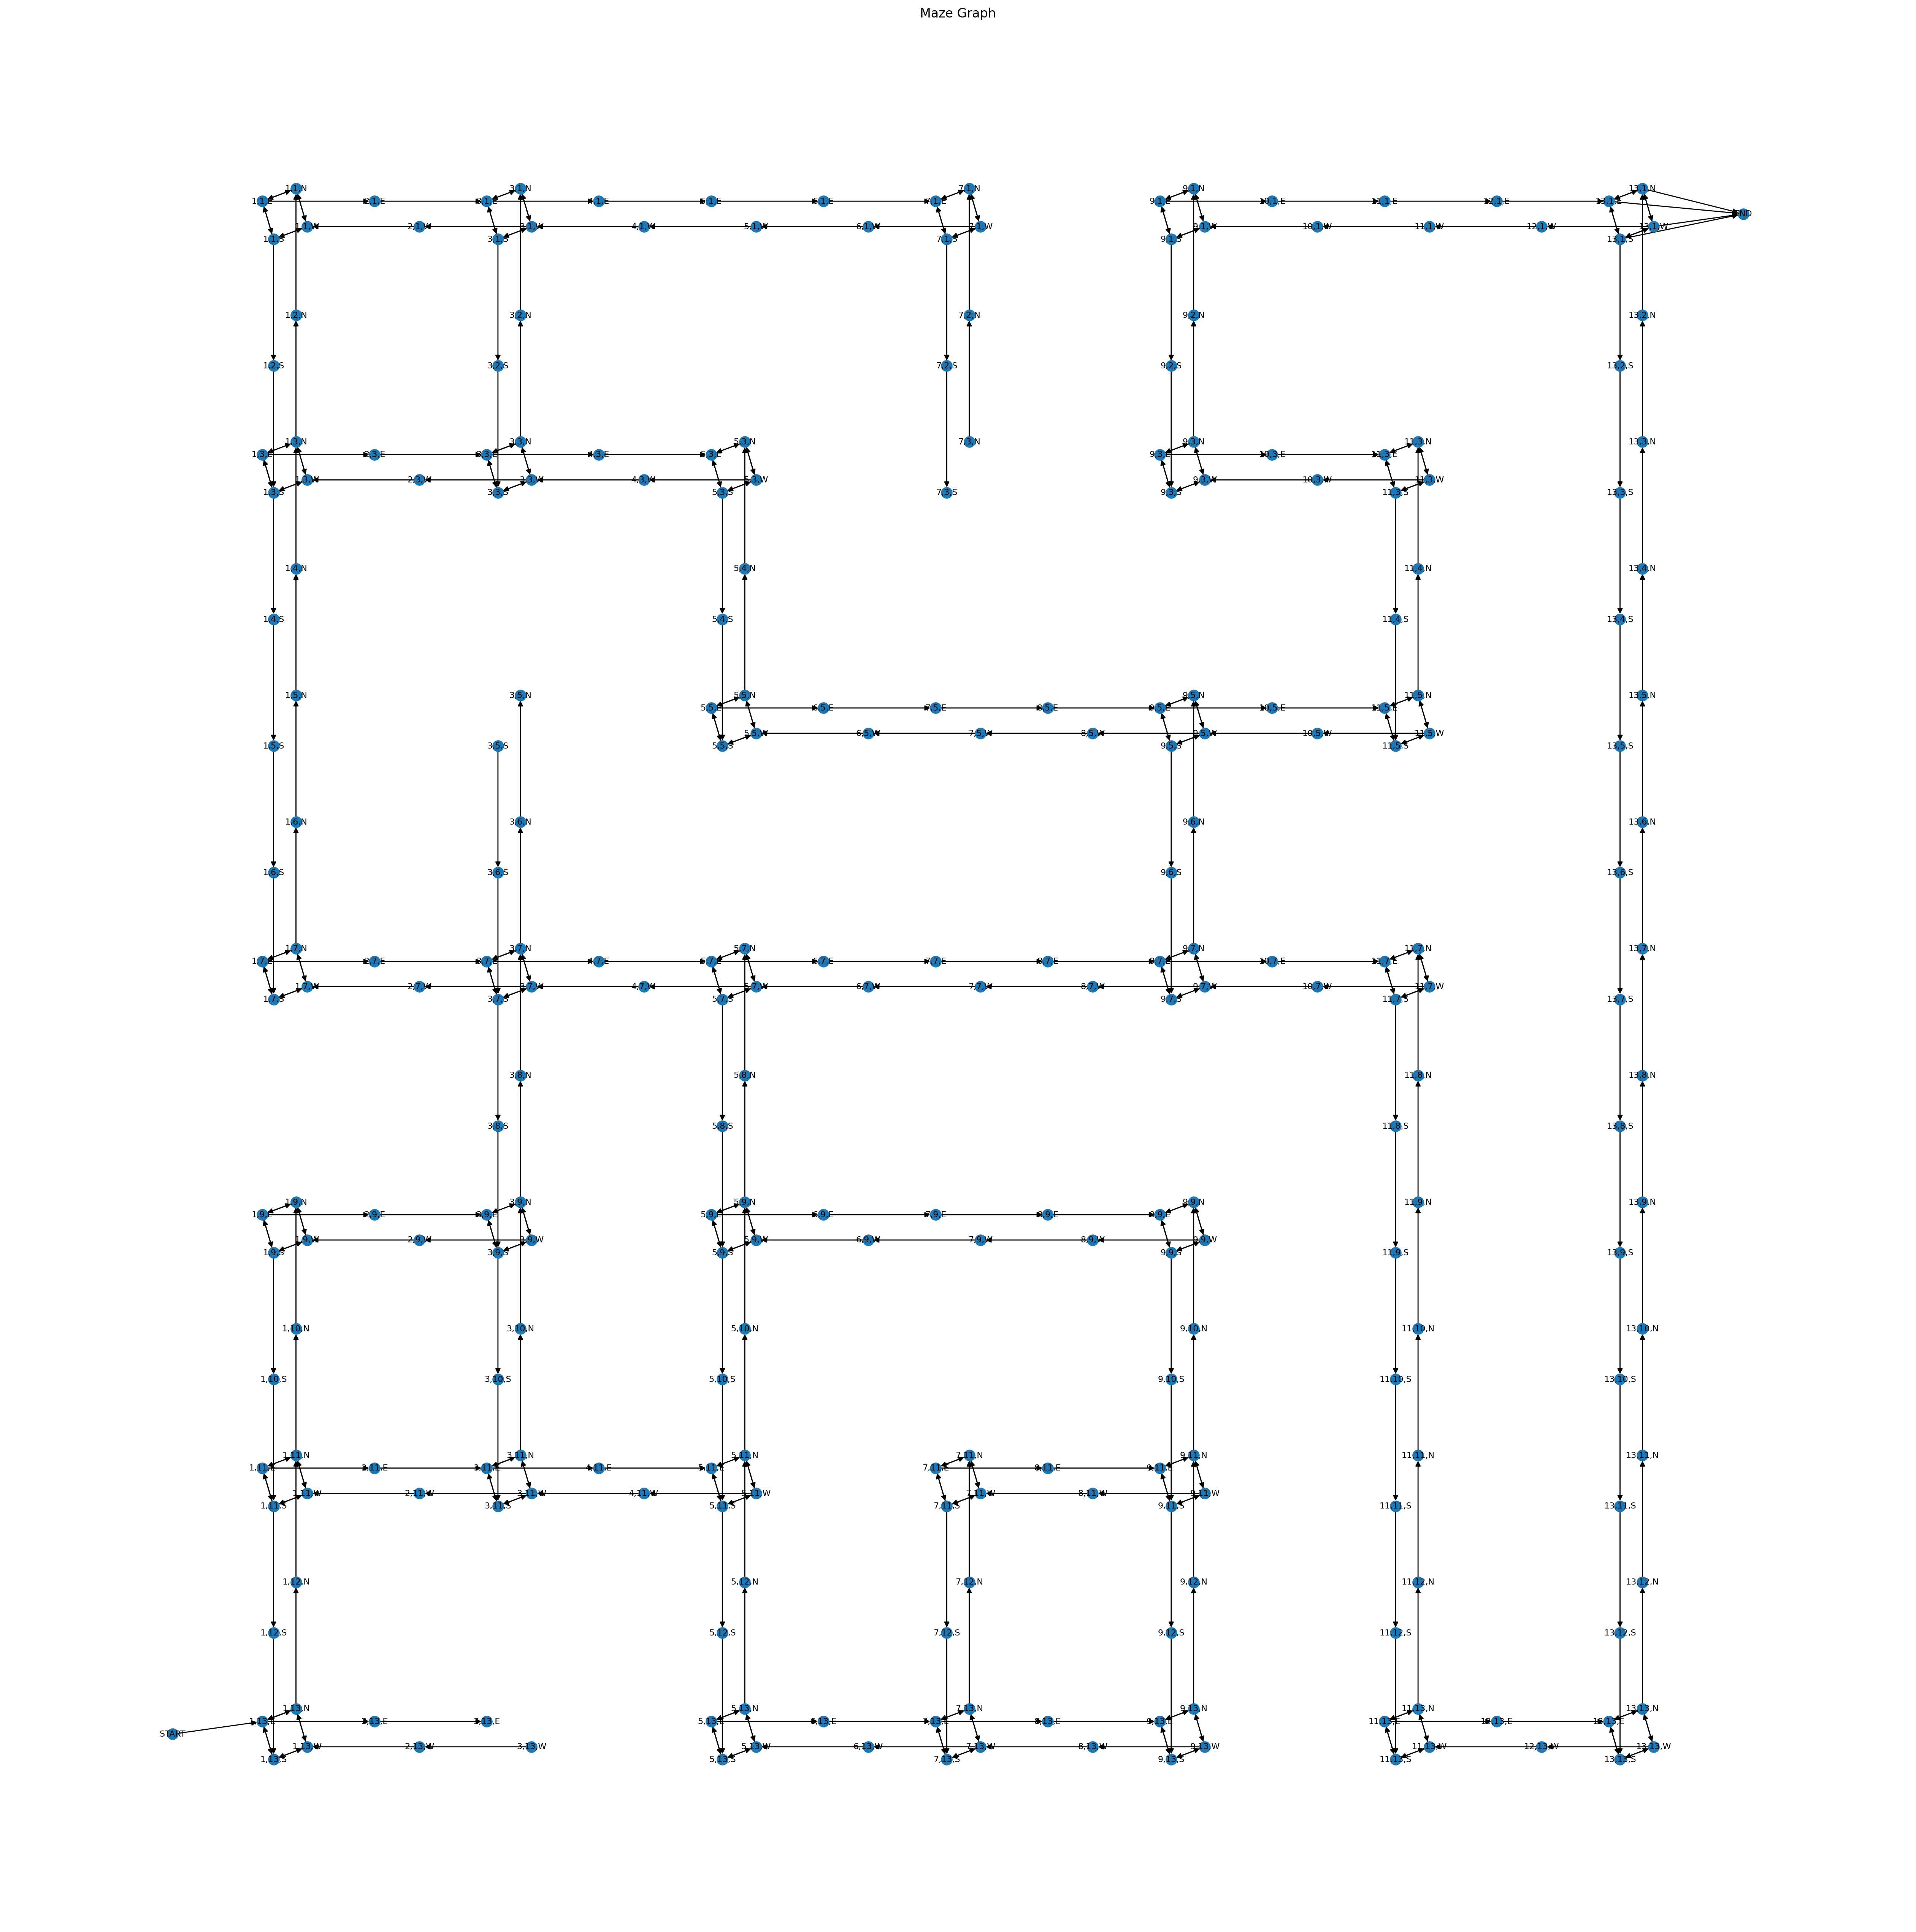

In [ ]:
def draw_maze_graph(G):
    import matplotlib.pyplot as plt
    
    # Parse maze for dimensions
    width = max([int(n.split(',')[0]) for n in G.nodes() if ',' in n]) + 1
    height = max([int(n.split(',')[1]) for n in G.nodes() if ',' in n]) + 1
    
    # Create position dictionary
    pos = {}
    
    # Regular nodes
    for node in G.nodes():
        if node == 'START':
            pos[node] = (0, -height+1)  # One row below
        elif node == 'END':
            pos[node] = (width, -1)  # One row above
        else:
            # Regular nodes "x,y,D"
            x, y, d = node.split(',')
            x, y = int(x), int(y)
            # Offset based on direction
            # dx = {'N': 0, 'E': 0.2, 'S': 0, 'W': -0.2}
            # dy = {'N': 0.2, 'E': 0, 'S': -0.2, 'W': 0}
            dx = {'N': 0.1, 'E': -0.2, 'S': -0.1, 'W':  0.2}
            dy = {'N': 0.2, 'E':  0.1, 'S': -0.2, 'W': -0.1}

            pos[node] = (x + dx[d], -y + dy[d])
    
    plt.figure(figsize=(25, 25))
    nx.draw(G, pos, with_labels=True, node_size=100, font_size=8)
    plt.title("Maze Graph")
    plt.show()

# Test with sample input
draw_maze_graph(sample1_G)

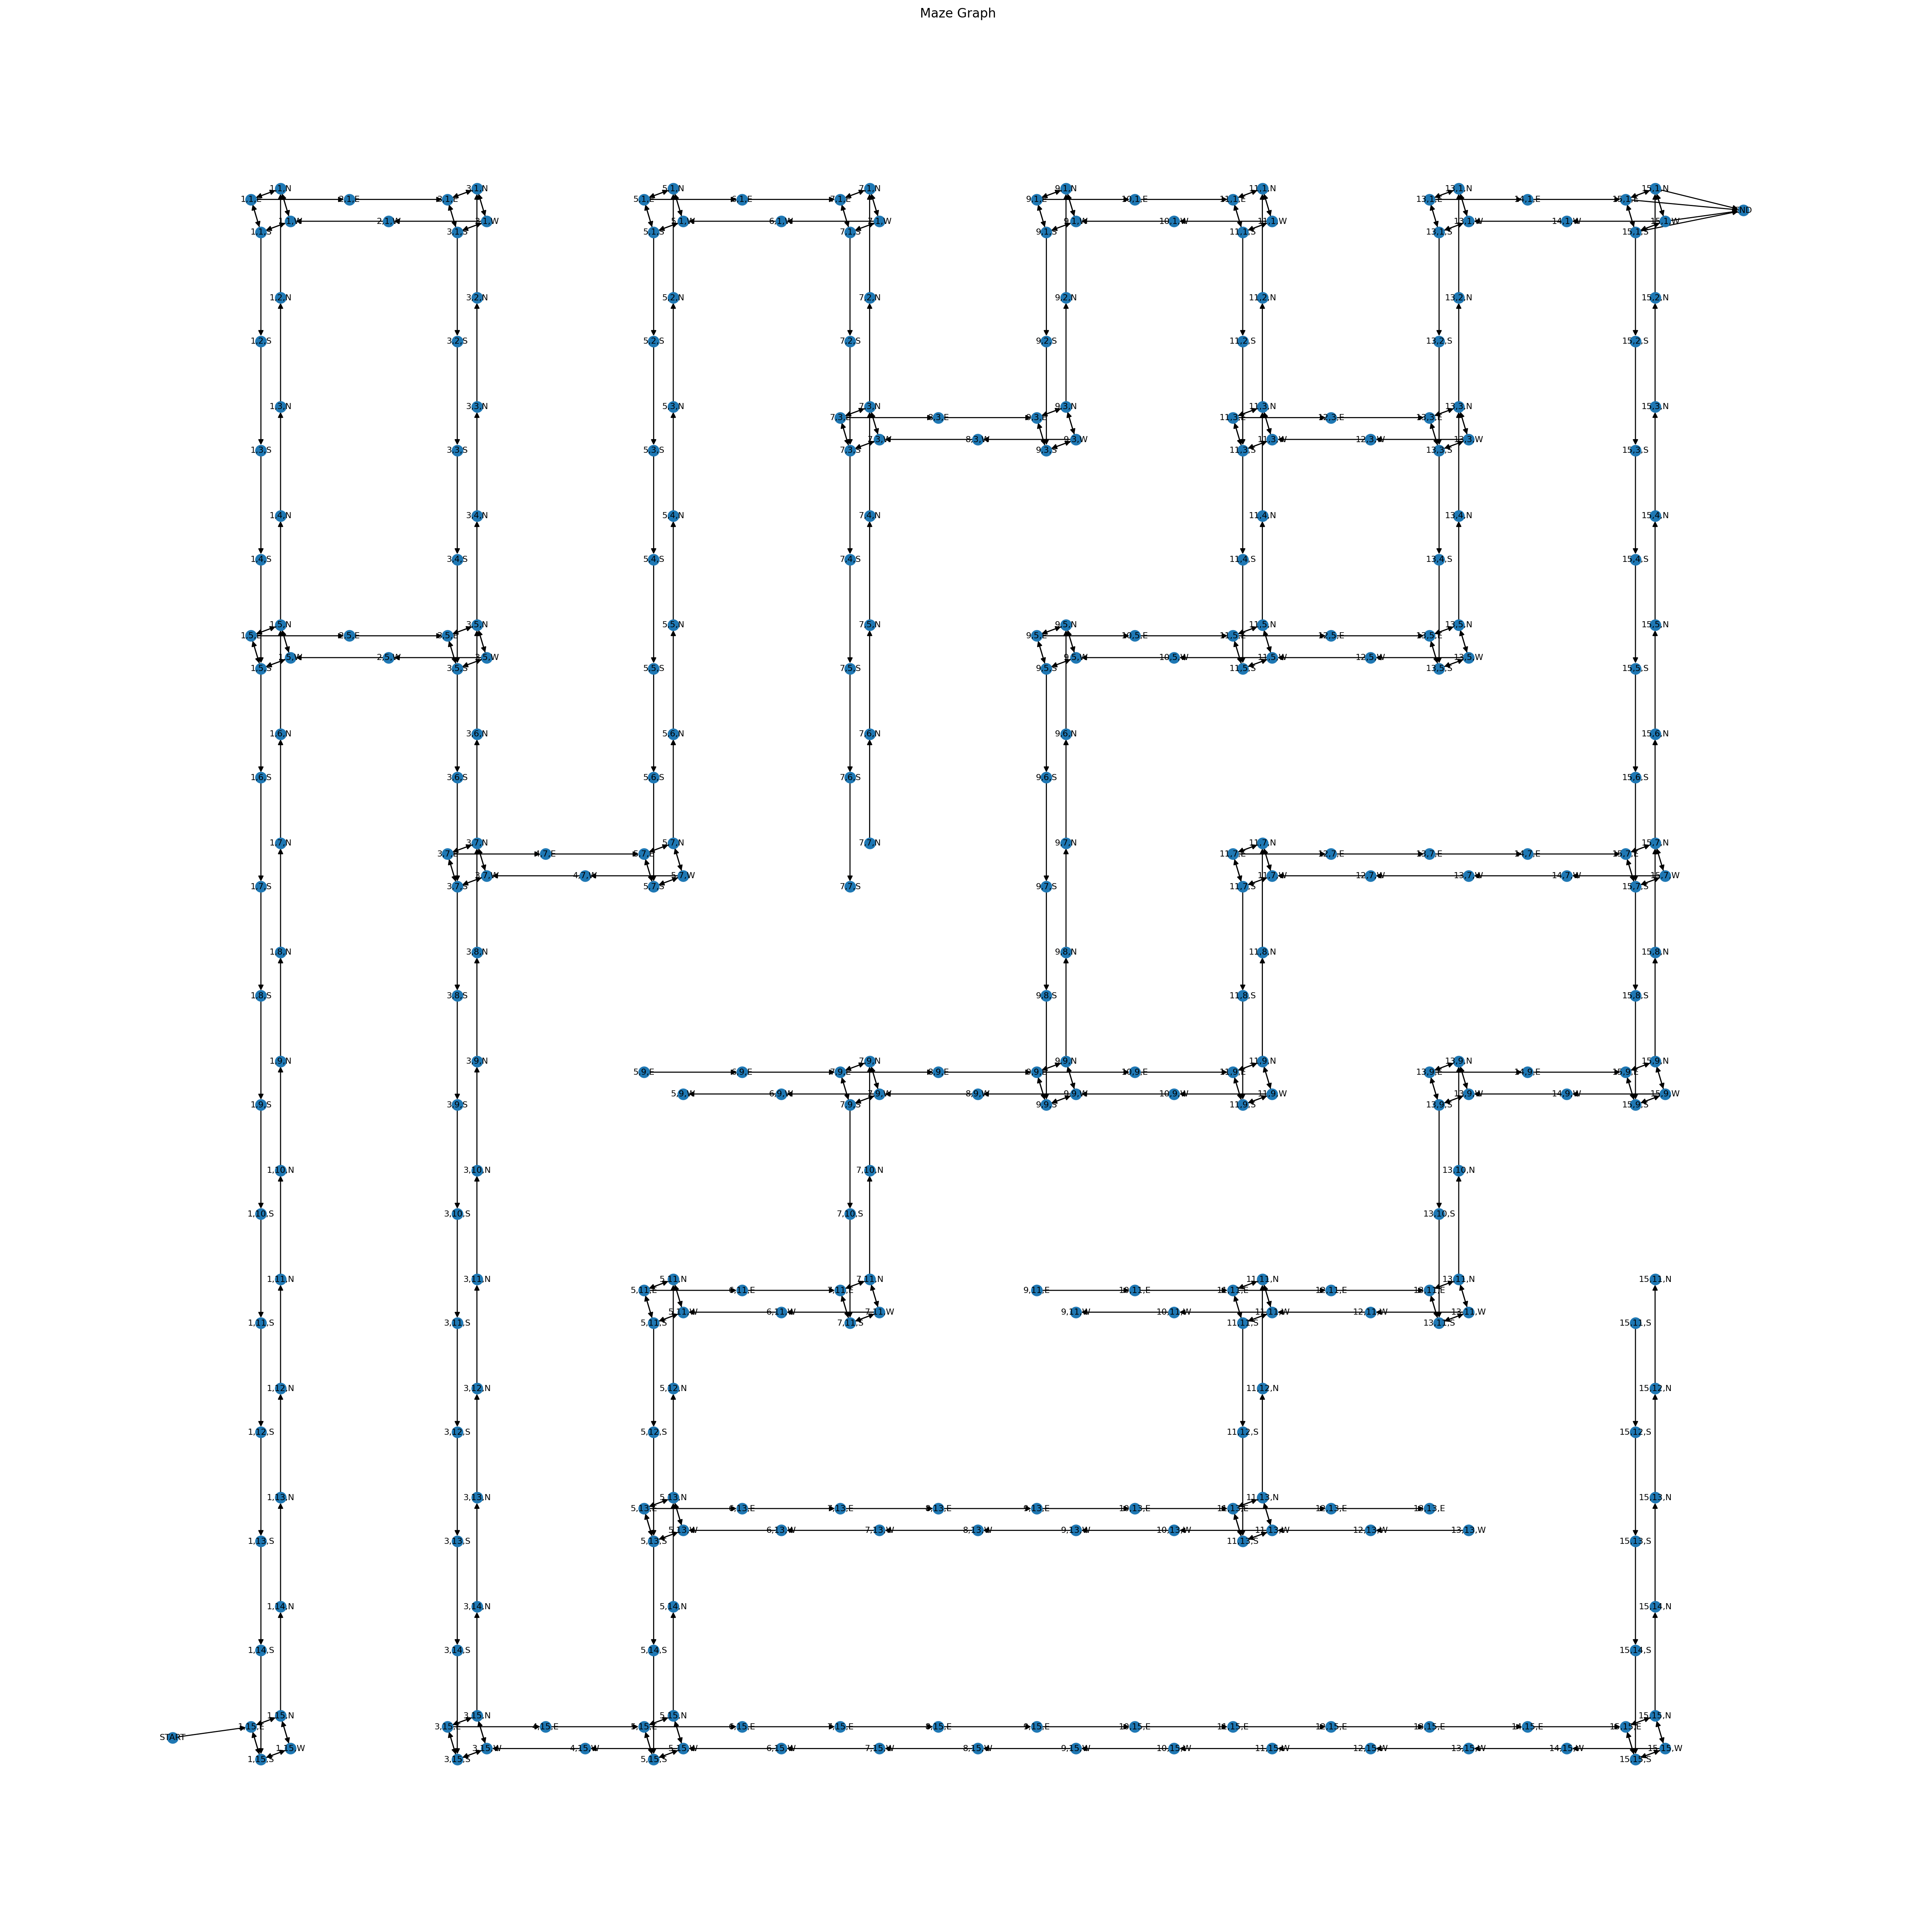

In [ ]:
draw_maze_graph(sample2_G)

**AI Prompt**

give a maze graph, start and end find a cheapest path from start to end

**AI Response**

We can use Dijkstra's algorithm through networkx's shortest_path function to find the cheapest path. Here's the implementation:

```python
def find_cheapest_path(G, start, end):
    try:
        path = nx.shortest_path(G, start, end, weight='weight')
        cost = nx.shortest_path_length(G, start, end, weight='weight')
        
        # Count moves and rotations
        rotations = sum(1 for i in range(len(path)-1) 
                       if G[path[i]][path[i+1]]['weight'] == 1000)
        moves = sum(1 for i in range(len(path)-1) 
                   if G[path[i]][path[i+1]]['weight'] == 1)
        
        print(f"Total cost: {cost}")
        print(f"Number of moves: {moves}")
        print(f"Number of rotations: {rotations}")
        return path, cost
    except nx.NetworkXNoPath:
        print("No path exists!")
        return None, float('inf')

# Test with sample input 1
print("Sample 1:")
path1, cost1 = find_cheapest_path(sample1_G, sample1_start, sample1_end)

print("\nSample 2:")
path2, cost2 = find_cheapest_path(sample2_G, sample2_start, sample2_end)
```

Would you like me to add visualization of the found paths or explain how the costs are calculated in more detail?

In [ ]:
def find_cheapest_path(G, start, end):
    try:
        path = nx.shortest_path(G, start, end, weight='weight')
        cost = nx.shortest_path_length(G, start, end, weight='weight')
        
        # Count moves and rotations
        rotations = sum(1 for i in range(len(path)-1) 
                       if G[path[i]][path[i+1]]['weight'] == 1000)
        moves = sum(1 for i in range(len(path)-1) 
                   if G[path[i]][path[i+1]]['weight'] == 1)
        
        print(f"Total cost: {cost}")
        print(f"Number of moves: {moves}")
        print(f"Number of rotations: {rotations}")
        return path, cost
    except nx.NetworkXNoPath:
        print("No path exists!")
        return None, float('inf')

# Test with sample input 1
print("Sample 1:")
path1, cost1 = find_cheapest_path(sample1_G, sample1_start, sample1_end)

print("\nSample 2:")
path2, cost2 = find_cheapest_path(sample2_G, sample2_start, sample2_end)

Sample 1:
Total cost: 7036
Number of moves: 36
Number of rotations: 7

Sample 2:
Total cost: 11048
Number of moves: 48
Number of rotations: 11


In [ ]:
def solve_part1():
    path = nx.shortest_path(full_G, full_start, full_end, weight='weight')
    cost = nx.shortest_path_length(full_G, full_start, full_end, weight='weight')
    return cost

solve_part1()

105496

that was correct answer

### Part 2

--- Part Two ---

Now that you know what the best paths look like, you can figure out the best spot to sit.

Every non-wall tile (S, ., or E) is equipped with places to sit along the edges of the tile. While determining which of these tiles would be the best spot to sit depends on a whole bunch of factors (how comfortable the seats are, how far away the bathrooms are, whether there's a pillar blocking your view, etc.), the most important factor is whether the tile is on one of the best paths through the maze. If you sit somewhere else, you'd miss all the action!

So, you'll need to determine which tiles are part of any best path through the maze, including the S and E tiles.

In the first example, there are 45 tiles (marked O) that are part of at least one of the various best paths through the maze:

```
###############
#.......#....O#
#.#.###.#.###O#
#.....#.#...#O#
#.###.#####.#O#
#.#.#.......#O#
#.#.#####.###O#
#..OOOOOOOOO#O#
###O#O#####O#O#
#OOO#O....#O#O#
#O#O#O###.#O#O#
#OOOOO#...#O#O#
#O###.#.#.#O#O#
#O..#.....#OOO#
###############
```

In the second example, there are 64 tiles that are part of at least one of the best paths:

```
#################
#...#...#...#..O#
#.#.#.#.#.#.#.#O#
#.#.#.#...#...#O#
#.#.#.#.###.#.#O#
#OOO#.#.#.....#O#
#O#O#.#.#.#####O#
#O#O..#.#.#OOOOO#
#O#O#####.#O###O#
#O#O#..OOOOO#OOO#
#O#O###O#####O###
#O#O#OOO#..OOO#.#
#O#O#O#####O###.#
#O#O#OOOOOOO..#.#
#O#O#O#########.#
#O#OOO..........#
#################
```

Analyze your map further. How many tiles are part of at least one of the best paths through the maze?

**AI Prompt**

I want to solve updated problem: find all cheapest paths from S to E using BFS

**AI Response**

We can modify the previous approach to find all paths with the same minimum cost using BFS. Here's the implementation:

```python
def find_all_cheapest_paths(G, start, end):
    # Use BFS with cost tracking
    queue = deque([(start, [start], 0)])  # (node, path, cost)
    min_cost = float('inf')
    best_paths = []
    
    # Keep track of minimum cost to reach each node
    costs = {start: 0}
    
    while queue:
        current, path, cost = queue.popleft()
        
        # Skip if we've found better paths
        if cost > min_cost:
            continue
            
        if current == end:
            if cost < min_cost:
                min_cost = cost
                best_paths = [path]
            elif cost == min_cost:
                best_paths.append(path)
            continue
            
        # Try all neighbors
        for next_node in G.neighbors(current):
            edge_cost = G[current][next_node]['weight']
            new_cost = cost + edge_cost
            
            # Only proceed if this is a potentially optimal path
            if new_cost <= min_cost and (
                next_node not in costs or new_cost <= costs[next_node]
            ):
                costs[next_node] = new_cost
                queue.append((next_node, path + [next_node], new_cost))
    
    return best_paths, min_cost

# Test with sample input
print("Sample 1:")
paths1, cost1 = find_all_cheapest_paths(sample1_G, sample1_start, sample1_end)
print(f"Found {len(paths1)} paths with cost {cost1}")
```

Would you like me to add:
1. A visualization of all the found paths?
2. A function to extract the unique tiles visited in all optimal paths?
3. Something else?

In [ ]:
def find_all_cheapest_paths(G: nx.Graph, start, end):
    # Use BFS with cost tracking
    queue = deque([(start, [start], 0)])  # (node, path, cost)
    min_cost = float('inf')
    best_paths = []
    
    # Keep track of minimum cost to reach each node
    costs = {start: 0}
    
    while queue:
        current, path, cost = queue.popleft()
        
        # Skip if we've found better paths
        if cost > min_cost:
            continue
            
        if current == end:
            if cost < min_cost:
                min_cost = cost
                best_paths = [path]
            elif cost == min_cost:
                best_paths.append(path)
            continue
            
        # Try all neighbors
        for next_node in G.neighbors(current):
            edge_cost = G[current][next_node]['weight']
            new_cost = cost + edge_cost
            
            # Only proceed if this is a potentially optimal path
            if new_cost <= min_cost and (
                next_node not in costs or new_cost <= costs[next_node]
            ):
                costs[next_node] = new_cost
                queue.append((next_node, path + [next_node], new_cost))
    
    return best_paths, min_cost

def count_unique_nodes(paths: list):
    all_positions = set()
    for path in paths:
        path_positions = set((node.split(',')[0], node.split(',')[1]) for node in path if node not in ['START','END'])
        all_positions |= path_positions
    return len(all_positions)

# Test with sample input
def test_count_all_paths_nodes():
    paths1, cost1 = find_all_cheapest_paths(sample1_G, sample1_start, sample1_end)
    count1 = count_unique_nodes(paths1)
    assert cost1==7036 and count1 == 45

    paths2, cost2 = find_all_cheapest_paths(sample2_G, sample2_start, sample2_end)
    count2 = count_unique_nodes(paths2)
    assert cost2==11048 and count2 == 64

test_count_all_paths_nodes()

In [ ]:
def solve_part2():
    pathsf, costf = find_all_cheapest_paths(full_G, full_start, full_end)
    countf = count_unique_nodes(pathsf)
    assert costf == solve_part1()
    return countf

solve_part2()

524